In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03-06-2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09-06-2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12-06-2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21-06-2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
df["DATE_DIED"].value_counts()

9999-99-99    971633
06-07-2020      1000
07-07-2020       996
13-07-2020       990
16-06-2020       979
               ...  
24-11-2020         1
17-12-2020         1
08-12-2020         1
16-03-2021         1
22-04-2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [5]:
#df['CLASIFFICATION_FINAL'].unique()

array([3, 5, 7, 6, 1, 2, 4], dtype=int64)

In [6]:
#df['MEDICAL_UNIT'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

In [7]:
#df['PNEUMONIA'].unique()

array([ 1,  2, 99], dtype=int64)

In [8]:
#df['USMER'].unique()

array([2, 1], dtype=int64)

In [9]:
#df['CARDIOVASCULAR'].value_counts()

2     1024730
1       20769
98       3076
Name: CARDIOVASCULAR, dtype: int64

In [10]:
#df['INTUBED'].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [11]:
#df['ICU'].value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [12]:
#df['PNEUMONIA'].value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [13]:
df['SEX']

0          1
1          2
2          2
3          1
4          2
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: SEX, Length: 1048575, dtype: int64

In [14]:
#these columns have very few missing values... so convert them into either 1 or 2.
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [15]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03-06-2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09-06-2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12-06-2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21-06-2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


<AxesSubplot:xlabel='SEX', ylabel='count'>

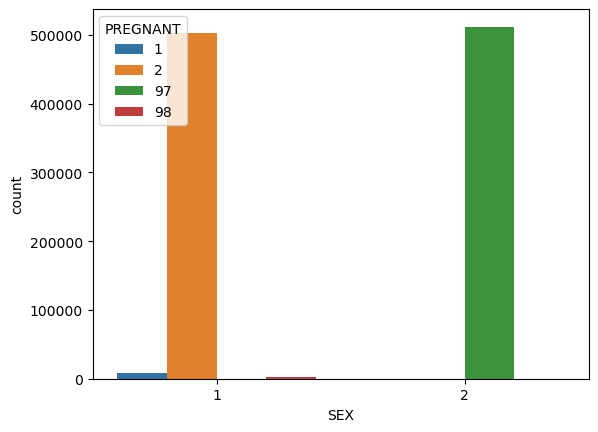

In [16]:
sns.countplot(df.SEX, hue = df.PREGNANT)

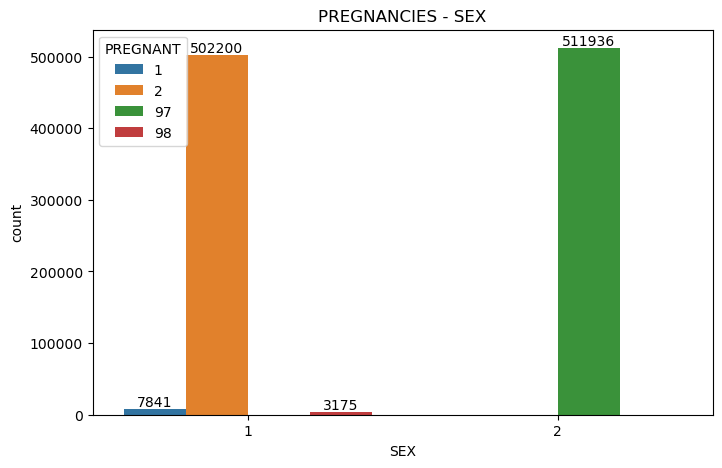

In [17]:
plt.figure(figsize = (8,5))
d = sns.countplot(df.SEX, hue = df.PREGNANT)
for i in d.containers:
    d.bar_label(i)
plt.title("PREGNANCIES - SEX");

### In pregnancies, 98 means null values for female and 97 means null values for males. We will convert 97 to 2 because men can't birth.

In [18]:
df.PREGNANT = df.PREGNANT.replace(98, 2)
df.PREGNANT = df.PREGNANT.replace(97, 2)

In [19]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03-06-2020,97,1,72,2,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09-06-2020,1,2,55,2,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12-06-2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21-06-2020,97,2,68,2,1,...,2,2,1,2,2,2,2,2,3,97


#### INTUBED , ICU Variables has so many null values. We delete it

In [20]:
df.drop("INTUBED", axis = 1, inplace = True)
df.drop("ICU", axis = 1, inplace = True)

In [21]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03-05-2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03-06-2020,1,72,2,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09-06-2020,2,55,2,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12-06-2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21-06-2020,2,68,2,1,2,2,2,1,2,2,2,2,2,3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025152 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1025152 non-null  int64 
 1   MEDICAL_UNIT          1025152 non-null  int64 
 2   SEX                   1025152 non-null  int64 
 3   PATIENT_TYPE          1025152 non-null  int64 
 4   DATE_DIED             1025152 non-null  object
 5   PNEUMONIA             1025152 non-null  int64 
 6   AGE                   1025152 non-null  int64 
 7   PREGNANT              1025152 non-null  int64 
 8   DIABETES              1025152 non-null  int64 
 9   COPD                  1025152 non-null  int64 
 10  ASTHMA                1025152 non-null  int64 
 11  INMSUPR               1025152 non-null  int64 
 12  HIPERTENSION          1025152 non-null  int64 
 13  OTHER_DISEASE         1025152 non-null  int64 
 14  CARDIOVASCULAR        1025152 non-null  int64 
 15

In [23]:
df.CLASIFFICATION_FINAL.value_counts()

7    490123
3    378629
6    117756
5     25305
1      8448
4      3090
2      1801
Name: CLASIFFICATION_FINAL, dtype: int64

### 1-2-3 means COVID and 4-5-6-7 means not COVID. So we convert like that.

In [24]:
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)

In [25]:
df.CLASIFFICATION_FINAL.value_counts()

2    636274
1    388878
Name: CLASIFFICATION_FINAL, dtype: int64

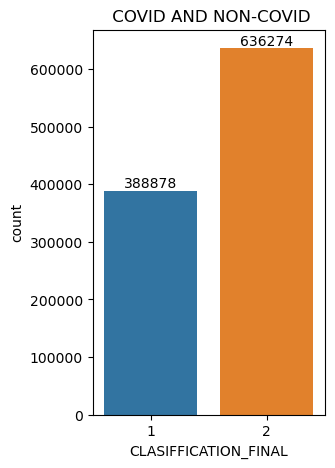

In [26]:
plt.figure(figsize = (3,5))
d = sns.countplot(df.CLASIFFICATION_FINAL)
for i in d.containers:
    d.bar_label(i)
plt.title(" COVID AND NON-COVID");

#### We will make a variable that shows us die date. So if we do anything with these dates, it means they are dead numbers.

In [27]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03-05-2020,1,65,2,2,2,2,2,1,2,2,2,2,2,1
1,2,1,2,1,03-06-2020,1,72,2,2,2,2,2,1,2,2,1,1,2,2
2,2,1,2,2,09-06-2020,2,55,2,1,2,2,2,2,2,2,2,2,2,1
3,2,1,1,1,12-06-2020,2,53,2,2,2,2,2,2,2,2,2,2,2,2
4,2,1,2,1,21-06-2020,2,68,2,1,2,2,2,1,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,40,2,2,2,2,2,2,2,2,2,2,2,2
1048571,1,13,2,2,9999-99-99,2,51,2,2,2,2,2,1,2,2,2,2,2,2
1048572,2,13,2,1,9999-99-99,2,55,2,2,2,2,2,2,2,2,2,2,2,2
1048573,2,13,2,1,9999-99-99,2,28,2,2,2,2,2,2,2,2,2,2,2,2


In [28]:
df["MONTH"] = df.DATE_DIED.str.split("-", expand = True)[1]
df["YEAR"] = df.DATE_DIED.str.split("-", expand = True)[2]

In [29]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,MONTH,YEAR
0,2,1,1,1,03-05-2020,1,65,2,2,2,...,2,1,2,2,2,2,2,1,05,2020
1,2,1,2,1,03-06-2020,1,72,2,2,2,...,2,1,2,2,1,1,2,2,06,2020
2,2,1,2,2,09-06-2020,2,55,2,1,2,...,2,2,2,2,2,2,2,1,06,2020
3,2,1,1,1,12-06-2020,2,53,2,2,2,...,2,2,2,2,2,2,2,2,06,2020
4,2,1,2,1,21-06-2020,2,68,2,1,2,...,2,1,2,2,2,2,2,1,06,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,40,2,2,2,...,2,2,2,2,2,2,2,2,99,99
1048571,1,13,2,2,9999-99-99,2,51,2,2,2,...,2,1,2,2,2,2,2,2,99,99
1048572,2,13,2,1,9999-99-99,2,55,2,2,2,...,2,2,2,2,2,2,2,2,99,99
1048573,2,13,2,1,9999-99-99,2,28,2,2,2,...,2,2,2,2,2,2,2,2,99,99


In [30]:
df.YEAR.value_counts()

99      950438
2020     74402
2021       312
Name: YEAR, dtype: int64

In [31]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,MONTH,YEAR
0,2,1,1,1,03-05-2020,1,65,2,2,2,...,2,1,2,2,2,2,2,1,05,2020
1,2,1,2,1,03-06-2020,1,72,2,2,2,...,2,1,2,2,1,1,2,2,06,2020
2,2,1,2,2,09-06-2020,2,55,2,1,2,...,2,2,2,2,2,2,2,1,06,2020
3,2,1,1,1,12-06-2020,2,53,2,2,2,...,2,2,2,2,2,2,2,2,06,2020
4,2,1,2,1,21-06-2020,2,68,2,1,2,...,2,1,2,2,2,2,2,1,06,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,40,2,2,2,...,2,2,2,2,2,2,2,2,99,99
1048571,1,13,2,2,9999-99-99,2,51,2,2,2,...,2,1,2,2,2,2,2,2,99,99
1048572,2,13,2,1,9999-99-99,2,55,2,2,2,...,2,2,2,2,2,2,2,2,99,99
1048573,2,13,2,1,9999-99-99,2,28,2,2,2,...,2,2,2,2,2,2,2,2,99,99


In [62]:
y1=df[(df['YEAR']=='2020' ) | (df['YEAR']=='2021' )]
y1['YEAR'].value_counts()

2020    74402
2021      312
Name: YEAR, dtype: int64

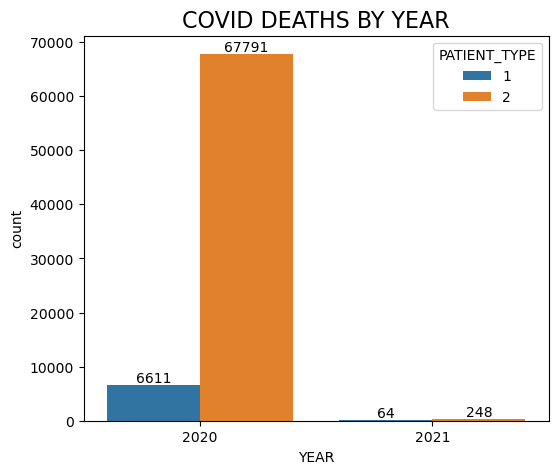

In [63]:
plt.figure(figsize = (6,5))
d = sns.countplot(x = "YEAR", hue = "PATIENT_TYPE", data = y1)
plt.title("COVID DEATHS BY YEAR", fontsize = 16)
for i in d.containers:
    d.bar_label(i)

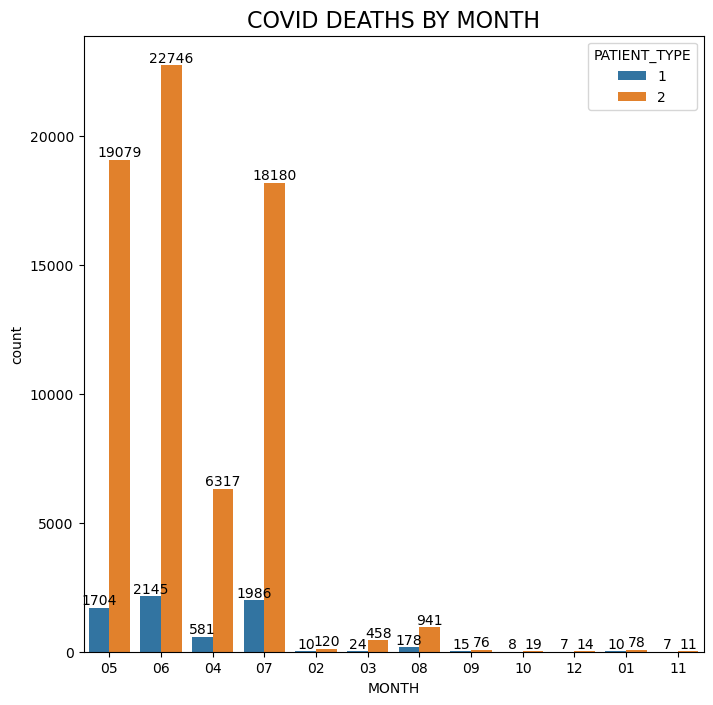

In [65]:
plt.figure(figsize = (8,8))
d = sns.countplot(x = "MONTH", hue = "PATIENT_TYPE", data = y1)
plt.title("COVID DEATHS BY MONTH", fontsize = 16)
for i in d.containers:
    d.bar_label(i)

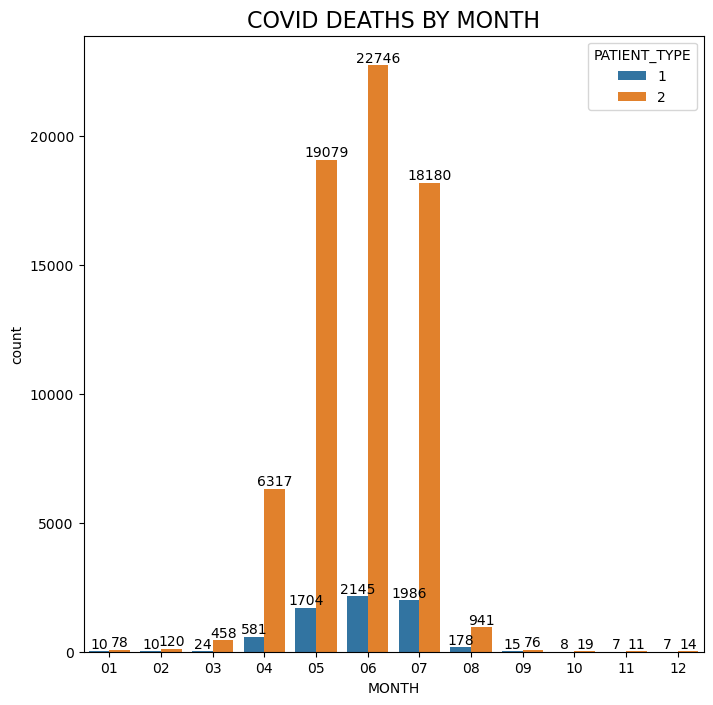

In [46]:
plt.figure(figsize = (8,8))
d = sns.countplot(x =y1['MONTH'].sort_values(ascending=True), hue = "PATIENT_TYPE", data = y1)
plt.title("COVID DEATHS BY MONTH", fontsize = 16)
for i in d.containers:
    d.bar_label(i)

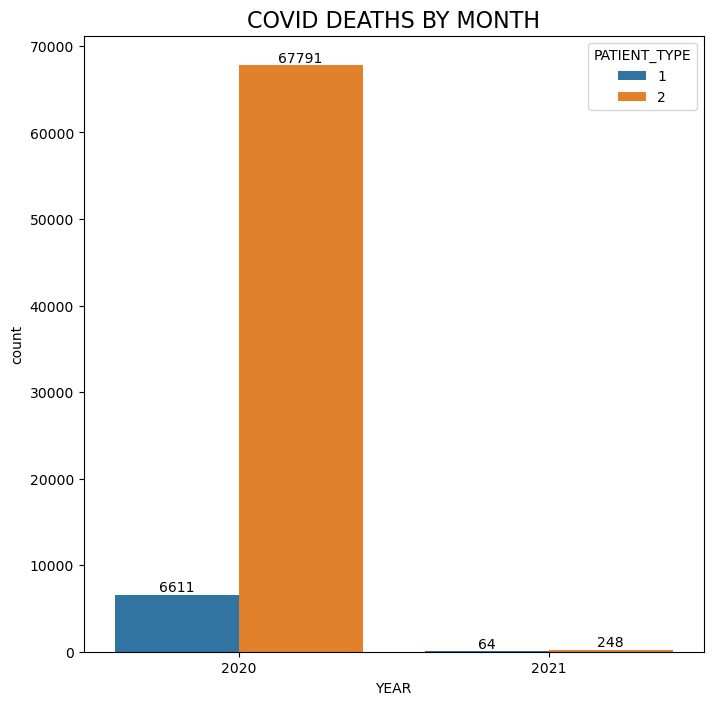

In [61]:
plt.figure(figsize = (8,8))
#d = sns.countplot(x =y1['MONTH'].sort_values(ascending=True), hue = "PATIENT_TYPE", data = y1)
d1 = sns.countplot(x =y1['YEAR'].sort_values(ascending=True), hue = "PATIENT_TYPE", data = y1)
plt.title("COVID DEATHS BY MONTH", fontsize = 16)
for i in d1.containers:
    d1.bar_label(i)

In [71]:
y2=df[(df['YEAR']=='2020')]
y2['YEAR'].value_counts()

2020    74402
Name: YEAR, dtype: int64

In [72]:
y2.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,MONTH,YEAR
0,2,1,1,1,03-05-2020,1,65,2,2,2,...,2,1,2,2,2,2,2,1,05,2020
1,2,1,2,1,03-06-2020,1,72,2,2,2,...,2,1,2,2,1,1,2,2,06,2020
2,2,1,2,2,09-06-2020,2,55,2,1,2,...,2,2,2,2,2,2,2,1,06,2020
3,2,1,1,1,12-06-2020,2,53,2,2,2,...,2,2,2,2,2,2,2,2,06,2020
4,2,1,2,1,21-06-2020,2,68,2,1,2,...,2,1,2,2,2,2,2,1,06,2020


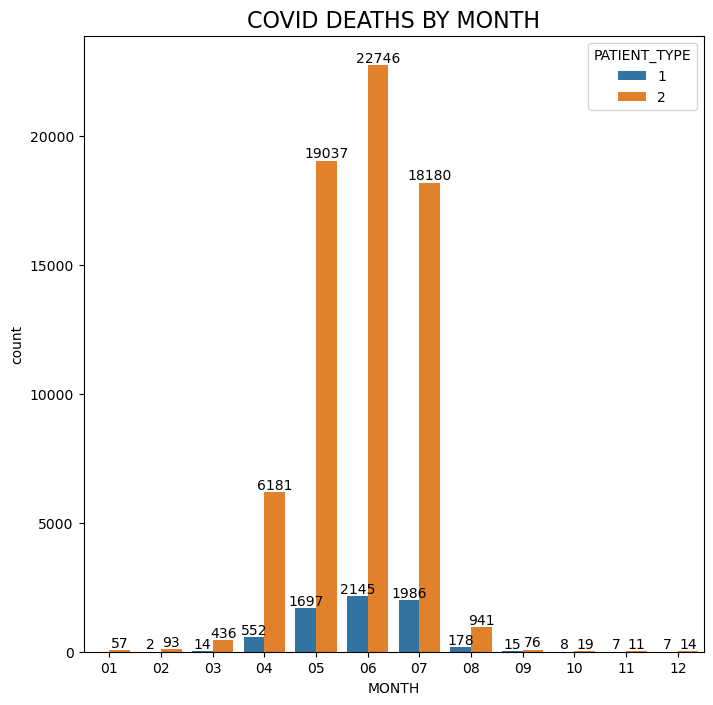

In [76]:
plt.figure(figsize = (8,8))
d = sns.countplot(x = y2["MONTH"].sort_values(ascending=True), hue = "PATIENT_TYPE", data = y2)
plt.title("COVID DEATHS BY MONTH", fontsize = 16)
for i in d.containers:
    d.bar_label(i)

In [74]:
y3=df[(df['YEAR']=='2021')]
y3['YEAR'].value_counts()

2021    312
Name: YEAR, dtype: int64

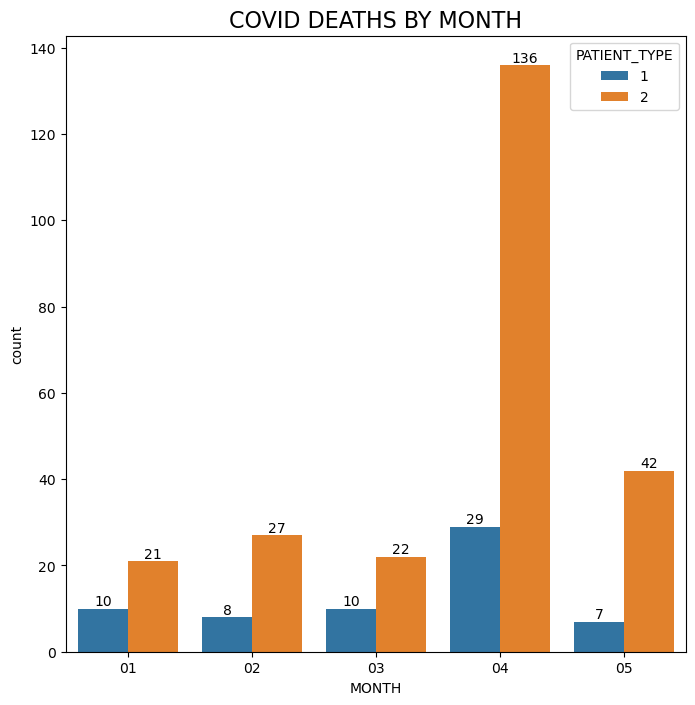

In [78]:
plt.figure(figsize = (8,8))
d = sns.countplot(x = y3["MONTH"].sort_values(ascending=True), hue = "PATIENT_TYPE", data = y3)
plt.title("COVID DEATHS BY MONTH", fontsize = 16)
for i in d.containers:
    d.bar_label(i)

In [79]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,MONTH,YEAR
0,2,1,1,1,03-05-2020,1,65,2,2,2,...,2,1,2,2,2,2,2,1,05,2020
1,2,1,2,1,03-06-2020,1,72,2,2,2,...,2,1,2,2,1,1,2,2,06,2020
2,2,1,2,2,09-06-2020,2,55,2,1,2,...,2,2,2,2,2,2,2,1,06,2020
3,2,1,1,1,12-06-2020,2,53,2,2,2,...,2,2,2,2,2,2,2,2,06,2020
4,2,1,2,1,21-06-2020,2,68,2,1,2,...,2,1,2,2,2,2,2,1,06,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,40,2,2,2,...,2,2,2,2,2,2,2,2,99,99
1048571,1,13,2,2,9999-99-99,2,51,2,2,2,...,2,1,2,2,2,2,2,2,99,99
1048572,2,13,2,1,9999-99-99,2,55,2,2,2,...,2,2,2,2,2,2,2,2,99,99
1048573,2,13,2,1,9999-99-99,2,28,2,2,2,...,2,2,2,2,2,2,2,2,99,99


In [80]:
df.drop(["DATE_DIED", "MONTH", "YEAR"], axis = 1, inplace = True)

In [81]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,2
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,2
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,2,40,2,2,2,2,2,2,2,2,2,2,2,2
1048571,1,13,2,2,2,51,2,2,2,2,2,1,2,2,2,2,2,2
1048572,2,13,2,1,2,55,2,2,2,2,2,2,2,2,2,2,2,2
1048573,2,13,2,1,2,28,2,2,2,2,2,2,2,2,2,2,2,2


In [82]:
df["CLASIFFICATION_FINAL"] = df["CLASIFFICATION_FINAL"] - 1
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,0
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,0
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,2,40,2,2,2,2,2,2,2,2,2,2,2,1
1048571,1,13,2,2,2,51,2,2,2,2,2,1,2,2,2,2,2,1
1048572,2,13,2,1,2,55,2,2,2,2,2,2,2,2,2,2,2,1
1048573,2,13,2,1,2,28,2,2,2,2,2,2,2,2,2,2,2,1


### Modelling

In [83]:
X = df.drop("CLASIFFICATION_FINAL", axis = 1)
y = df["CLASIFFICATION_FINAL"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### 3.XG boost (default parameters)

In [ ]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)

#Prediction
ypred_train=xgb_model.predict(X_train)
ypred_test=xgb_model.predict(X_test)

#Evaluation
#1.Train & test accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy",accuracy_score(y_train,ypred_train))
print("Test accuracy",accuracy_score(y_test,ypred_test))

#2.Cross Validation Score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(xgb_model,X=X,y=y,cv=5)
print("cross validation score:",scores.mean())

####   Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator=XGBClassifier()

param_grid={'n_estimators':[10,20,40,50],
            'max_depth':[4,5,6],
            'gamma':[0,0.3,0.5,1]}

grid=GridSearchCV(xgb_model,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_

### Feature imp

In [ ]:
grid.best_estimator_.feature_importances_

In [ ]:
feats=pd.DataFrame(index=X.columns,
                   data=grid.best_estimator_.feature_importances_,
                  columns=['Importance'])
important_features=feats[feats['Importance']>0.01]
imp_features_list=feats[feats['Importance']>0.01].index.to_list()
imp_features_list

In [ ]:
X_imp=X[imp_features_list]    #dropped unimp features

X_train,X_test,y_train,y_test= train_test_split(X_imp,y,test_size=0.3,random_state=42)

xgb_bhp=XGBClassifier(gamma=0.3,max_depth=6,n_estimators=50)
xgb_bhp.fit(X_train,y_train)

ypred_train=xgb_bhp.predict(X_train)
predictions=xgb_bhp.predict(X_test)

from sklearn.metrics import accuracy_score
print("Train_accuracy:",accuracy_score(y_train,ypred_train))
print("Test_accuracy:",accuracy_score(y_test,predictions))

scores=cross_val_score(xgb_bhp,X,y,cv=5)
print("Cross validation score:", scores.mean())